In [51]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import gensim
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import  PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks= True, grid=False)


In [53]:
path = ""

df = pd.read_csv(path+"resume.csv", encoding="latin-1")

In [54]:
df = df.drop("resume_id",axis=1)

In [55]:
df.head(1)

,class,resume_text
0,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...


In [56]:
df.tail(1)

,class,resume_text
124,not_flagged,\rResearch and Development Scientist - Burling...


In [58]:
df["class"] = df["class"].astype("category")


In [59]:
df["class"] = df["class"].cat.codes 

<Axes: xlabel='class', ylabel='count'>

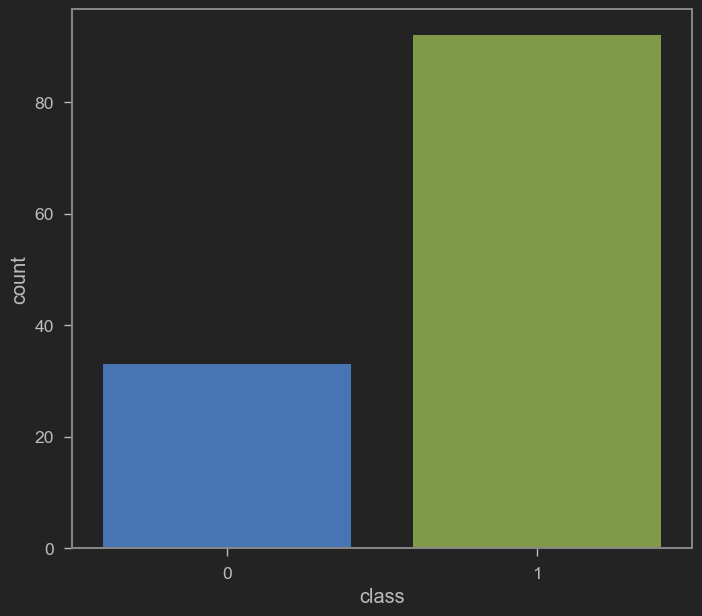

In [60]:
sns.countplot(x="class", data=df)

In [49]:
df["length"] = df["resume_text"].apply(len)

<Axes: xlabel='length', ylabel='Count'>

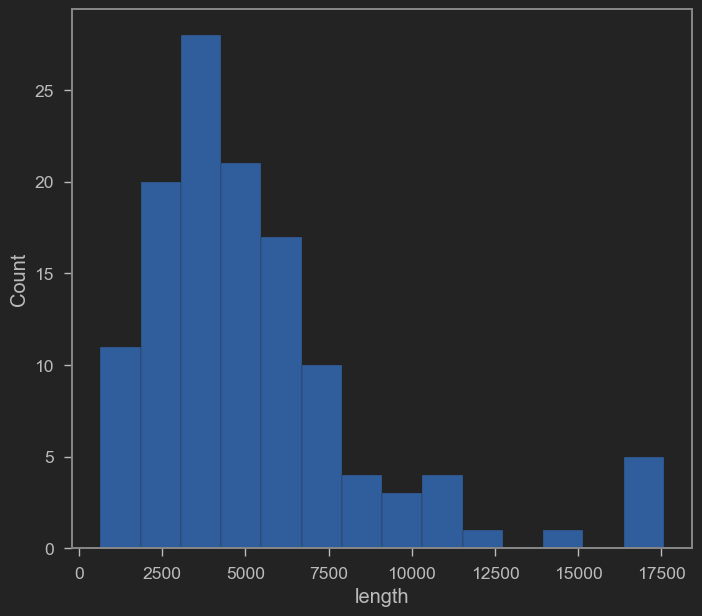

In [50]:
sns.histplot(df["length"])


In [68]:
df["resume_text"] = df["resume_text"].apply(lambda x: x.replace("\r", ""))
df_not_flagged =  df[df["class"]==1]
df_flagged  = df[df["class"]==0]

In [65]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muril\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muril\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from nltk.corpus import stopwords

In [78]:
stop_words = stopwords.words("english")

In [80]:
stop_words.extend(["from", "subject", "re", "edu", "user", "use", "email", "com"])

In [96]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        token = token.lower()
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    
    return " ".join(result)
    

In [97]:
df["clean_text"] = df["resume_text"].apply(preprocess)

In [106]:

df["clean_text"].tolist()[0]

'customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research pro

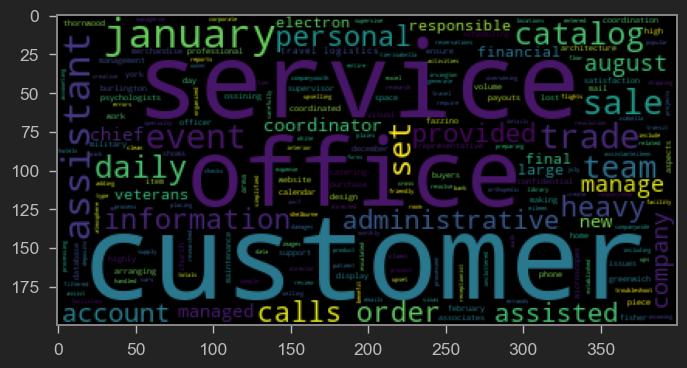

In [108]:
plt.imshow(WordCloud().generate(df["clean_text"].tolist()[0]))

In [109]:
df_not_flagged

,class,resume_text
0,1,Customer Service Supervisor/Tier - Isabella Ca...
1,1,Engineer / Scientist - IBM Microelectronics Di...
2,1,LTS Software Engineer Computational Lithograph...
3,1,TUTORWilliston VT - Email me on Indeed: indee...
5,1,Poultney VT - Email me on Indeed: indeed.com/r...
...,...,...
119,1,ProfessionalNewbury VT - Email me on Indeed: i...
120,1,Brattleboro VT - Email me on Indeed: indeed.co...
121,1,Research and Teaching Assistant - University o...
122,1,Medical Coder - Highly Skilled - Entry LevelSu...


In [112]:
from sklearn.feature_extraction.text import CountVectorizer

In [113]:
model_creat = CountVectorizer()

In [114]:
X = model_creat.fit_transform(df["clean_text"])

In [117]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [119]:
model_creat.get_feature_names_out()

array(['aaalac', 'aabb', 'aac', ..., 'ãæcomputer', 'ètravel', 'ô_torrent'],
      dtype=object)

In [121]:
df_test =pd.DataFrame(X.toarray(), columns =model_creat.get_feature_names_out())

In [124]:
df_test.sum(axis=0).sort_values(ascending=False)

research     476
data         449
new          274
work         268
analysis     266
            ... 
iibiology      1
iia            1
igor           1
ignite         1
ô_torrent      1
Length: 11313, dtype: int64

In [125]:
X = X.toarray()

In [127]:
y = df["class"]

In [135]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [136]:
model1 = MultinomialNB()

In [137]:
model1.fit(X_train,y_train)

MultinomialNB()

In [138]:
y_predict = model1.predict(X_test)

In [139]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       0.86      0.72      0.78        25

    accuracy                           0.69        32
   macro avg       0.61      0.65      0.61        32
weighted avg       0.75      0.69      0.71        32



In [140]:
letters = ['w','w','a','t','k','a','p']
print(len(list(set(letters))))

5


{'a', 'k', 'p', 't', 'w'}